<a href="https://colab.research.google.com/github/ThanhPhuongDA/SQL/blob/main/Bitcoin_closing_price_during_3_years_since_2019_04_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This project aims to get Historical Bitcoin price data in the last 3 years using Python and SQL.


In [2]:
import pandas as pd
!pip install yfinance

In [3]:
#Import libraries yfinance, which is not affiliated, endorsed, or vetted by Yahoo, Inc. 
#It's an open-source tool that uses Yahoo's publicly available APIs, and is intended for research and educational purposes.

import yfinance as yf

In [4]:
# Get the data from https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD by using the The Ticker module
# For more information, I would refer to this https://github.com/ranaroussi/yfinance/blob/main/README.md

In [5]:
df = yf.Ticker("BTC-USD").history(period="3y",interval ="1d")

In [6]:
print(df.head())

                   Open         High          Low        Close       Volume  \
Date                                                                          
2019-04-12  5061.200684  5103.274414  4955.852539  5089.539062  13675206312   
2019-04-13  5088.850098  5127.122070  5061.589355  5096.586426  10823289598   
2019-04-14  5095.758789  5184.016113  5053.568359  5167.722168  10391952498   
2019-04-15  5167.321777  5196.606934  5024.069336  5067.108398  12290155061   
2019-04-16  5066.577637  5238.945312  5055.194824  5235.559570  11618660197   

            Dividends  Stock Splits  
Date                                 
2019-04-12          0             0  
2019-04-13          0             0  
2019-04-14          0             0  
2019-04-15          0             0  
2019-04-16          0             0  


In [7]:
df.shape

(1097, 7)

In [8]:
# Save the file to disk space in CSV format

In [9]:
df.to_csv('bitcoin.csv')        


In [10]:
import csv
import sqlite3

In [11]:
database = 'tds.sqlite'


In [12]:
conn = sqlite3.connect(database)
cur = conn.cursor()

In [13]:
#Before creating the table, let’s drop the table with the below line of code if it is already present in the database.
drop_table_query = "DROP TABLE IF EXISTS bitcoin"
cur.execute(drop_table_query)
conn.commit()

In [14]:
#Now, let’s create a new table named bitcoin

create_table_query = "CREATE TABLE IF NOT EXISTS bitcoin(\
                        Date String, Open REAL,\
                        High REAL, Low REAL,\
                        Close REAL,Volume INTEGER,Dividends INTEGER,\
                        Stock_Splits INTEGER)"
cur.execute(create_table_query)
conn.commit()

In [15]:
#After creating the table, quickly check if the table is created with the required columns.

check_table_cols = "SELECT * FROM bitcoin"
cur.execute(check_table_cols)
col_name_list = [tuple[0] for tuple in cur.description]
col_name_list

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock_Splits']

In [16]:
#Read the data from the CSV File

df = pd.read_csv("bitcoin.csv", header=1) 
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock_Splits']
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits
0,2019-04-13,5088.850098,5127.122070,5061.589355,5096.586426,10823289598,0,0
1,2019-04-14,5095.758789,5184.016113,5053.568359,5167.722168,10391952498,0,0
2,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,12290155061,0,0
3,2019-04-16,5066.577637,5238.945312,5055.194824,5235.559570,11618660197,0,0
4,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,12438480677,0,0
5,2019-04-18,5251.480469,5319.986328,5250.506836,5298.385742,13256489918,0,0
6,2019-04-19,5298.154297,5336.680176,5233.334961,5303.812500,13780238655,0,0
7,2019-04-20,5304.160645,5358.490723,5295.877930,5337.886230,13169647522,0,0
8,2019-04-21,5335.878906,5359.924805,5257.339355,5314.531250,13731844223,0,0
9,2019-04-22,5312.494629,5422.687500,5280.276855,5399.365234,14601631648,0,0


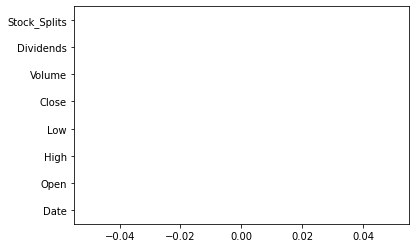

In [17]:
df.isna().sum().plot(kind='barh')


In [18]:
#Looks like, there are NO null values in the dataset.
#There are still some unwanted columns in the dataset, so that these columns shall not be pushed into SQLite Database. 
# Hence, let's select the subset of this data.

In [19]:
subdf = df [["Date", "Open", "High",\
             "Low","Close", "Volume"]]
subdf.head(10)

,Date,Open,High,Low,Close,Volume
0,2019-04-13,5088.850098,5127.122070,5061.589355,5096.586426,10823289598
1,2019-04-14,5095.758789,5184.016113,5053.568359,5167.722168,10391952498
2,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,12290155061
3,2019-04-16,5066.577637,5238.945312,5055.194824,5235.559570,11618660197
4,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,12438480677
5,2019-04-18,5251.480469,5319.986328,5250.506836,5298.385742,13256489918
6,2019-04-19,5298.154297,5336.680176,5233.334961,5303.812500,13780238655
7,2019-04-20,5304.160645,5358.490723,5295.877930,5337.886230,13169647522
8,2019-04-21,5335.878906,5359.924805,5257.339355,5314.531250,13731844223
9,2019-04-22,5312.494629,5422.687500,5280.276855,5399.365234,14601631648


In [20]:
#Load the Data in SQLite Database
subdf.to_sql('bitcoin', conn, if_exists="append", index=False)
print("Data Successfully exported !")

Data Successfully exported !


In [21]:
# Now let’s see what is in the database. I begin with the SELECT query

In [22]:
query = "SELECT * FROM bitcoin"
cur.execute(query)
conn.commit()
result = cur.fetchall()
resultdf = pd.DataFrame(result)
resultdf.columns = [tuple[0] for tuple in cur.description]
resultdf.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits
0,2019-04-13,5088.850098,5127.122070,5061.589355,5096.586426,10823289598,None,None
1,2019-04-14,5095.758789,5184.016113,5053.568359,5167.722168,10391952498,None,None
2,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,12290155061,None,None
3,2019-04-16,5066.577637,5238.945312,5055.194824,5235.559570,11618660197,None,None
4,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,12438480677,None,None


In [35]:
query = "SELECT min(Close) FROM bitcoin"
cur.execute(query)
conn.commit()
result = cur.fetchone()
print(result)


(4970.7880859375,)


In [34]:
query = "SELECT max(Close) FROM bitcoin"
cur.execute(query)
conn.commit()
result = cur.fetchone()
print(result)

(67566.828125,)


In [36]:
query = "SELECT avg(Close) FROM bitcoin"
cur.execute(query)
conn.commit()
result = cur.fetchone()
print(result)

(25475.889568690836,)


In [39]:
query = "SELECT avg(Close) FROM bitcoin WHERE Date BETWEEN '2019-04-13' AND '2020-04-13'"
cur.execute(query)
conn.commit()
result = cur.fetchone()
print(result)

(8555.585612866145,)


In [40]:
query = "SELECT avg(Close) FROM bitcoin WHERE Date BETWEEN '2020-04-13' AND '2021-04-13'"
cur.execute(query)
conn.commit()
result = cur.fetchone()
print(result)

(22076.250424244365,)


In [41]:
query = "SELECT avg(Close) FROM bitcoin WHERE Date BETWEEN '2021-04-13' AND '2022-04-13'"
cur.execute(query)
conn.commit()
result = cur.fetchone()
print(result)

(45951.00242936644,)


In [48]:
query = "SELECT avg(Volume) FROM bitcoin"
cur.execute(query)
conn.commit()
result = cur.fetchone()
print(result)

(34049668443.148724,)


In [49]:
query = "SELECT min(Volume) FROM bitcoin"
cur.execute(query)
conn.commit()
result = cur.fetchone()
print(result)

(10391952498,)


In [50]:
query = "SELECT max(Volume) FROM bitcoin"
cur.execute(query)
conn.commit()
result = cur.fetchone()
print(result)

(350967941479,)


In [23]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock_Splits      int64
dtype: object

In [24]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends                int64
Stock_Splits             int64
dtype: object

In [26]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits
0,2019-04-13,5088.850098,5127.122070,5061.589355,5096.586426,10823289598,0,0
1,2019-04-14,5095.758789,5184.016113,5053.568359,5167.722168,10391952498,0,0
2,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,12290155061,0,0
3,2019-04-16,5066.577637,5238.945312,5055.194824,5235.559570,11618660197,0,0
4,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,12438480677,0,0


In [42]:
df = df.drop(['Dividends','Stock_Splits'], axis=1)

In [43]:
df2 = df.set_index('Date')

In [45]:
df2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-04-13,5088.850098,5127.122070,5061.589355,5096.586426,10823289598
2019-04-14,5095.758789,5184.016113,5053.568359,5167.722168,10391952498
2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,12290155061
2019-04-16,5066.577637,5238.945312,5055.194824,5235.559570,11618660197
2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,12438480677


In [46]:
#Data visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib.dates

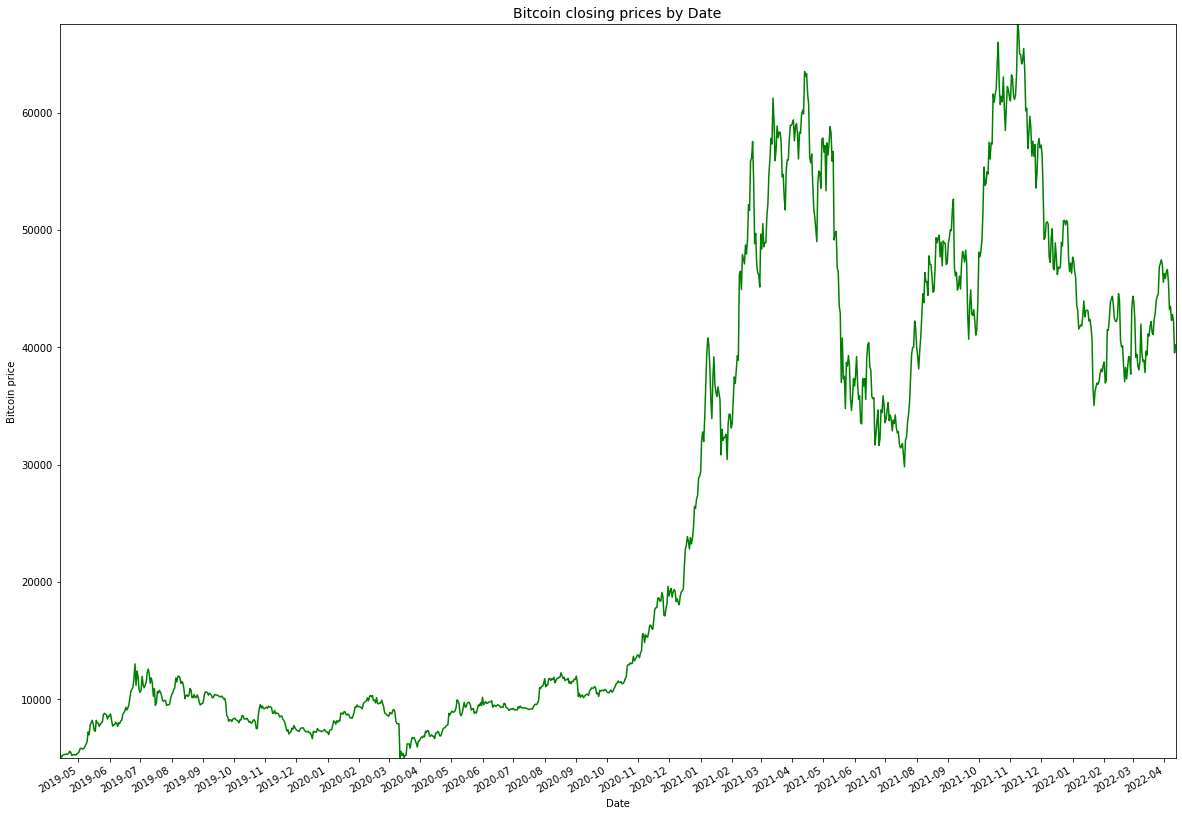

In [47]:
# Plotting the timeseries graph of the Bitcoin dataset
ig= plt.figure(figsize=(20,15))

plt.plot(df2['Close'],color='green',alpha=1)
plt.title('Bitcoin closing prices by Date',fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.xlabel("Date")
plt.ylabel("Bitcoin price")
plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()
plt.margins(x=0,y=0)
plt.show()



In [30]:
# As can be seen from the line graph, there was an upward trend in the Bitcoin prices over 3 years from April 2019 to April 2022.
# From 2019 to the end of 2020, the price fluctuated around 15K USD. From December 2020 to April 2021 , there was a sharp increase in Bitcoin's price to arpund 63K.
# After that in July, it dropped half of its price to about 32K and then rose again to reach the highest peak of 67K in November 2021. 
# In the last period of 5 months between December 2021 and April 2022, Bitcoin price decreased to around 43K USD.